# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [3]:
# your code here
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import random
%matplotlib inline

In [4]:
#Simulating categories in Twitter
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
categories

['Food',
 'Travel',
 'Fashion',
 'Fitness',
 'Music',
 'Culture',
 'Family',
 'Health']

In [5]:
#Defining the fuction for generating random dates and time when the tweets were made
def random_dates(start, end, n):
     
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

In [6]:
#Filling the dictionary with variables Date, Category, and Likes
data = {'Date': random_dates(pd.to_datetime('2020-01-01'), pd.to_datetime('2023-01-01'), 500), 'Category': [random.choice(categories) for _ in range(500)], 'Likes': np.random.randint(0,10000, size=500)}

In [7]:
#Converting the dictionary into a pandas dataframe
dframe = pd.DataFrame.from_dict(data)

In [8]:
dframe.head()

,Date,Category,Likes
0,2020-11-15 18:06:30,Music,947
1,2021-10-21 01:47:47,Fashion,6500
2,2022-10-16 04:41:58,Culture,7202
3,2022-08-04 04:03:32,Fitness,5028
4,2022-08-29 01:09:50,Food,3662


In [9]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [10]:
dframe.describe()

,Likes
count,500.000000
mean,5054.856000
std,2863.209717
min,10.000000
25%,2582.750000
50%,5168.500000
75%,7444.000000
max,9999.000000


In [11]:
#Number of tweets by Category
dframe['Category'].value_counts()

Culture    74
Fashion    69
Fitness    64
Health     63
Food       61
Family     60
Travel     59
Music      50
Name: Category, dtype: int64

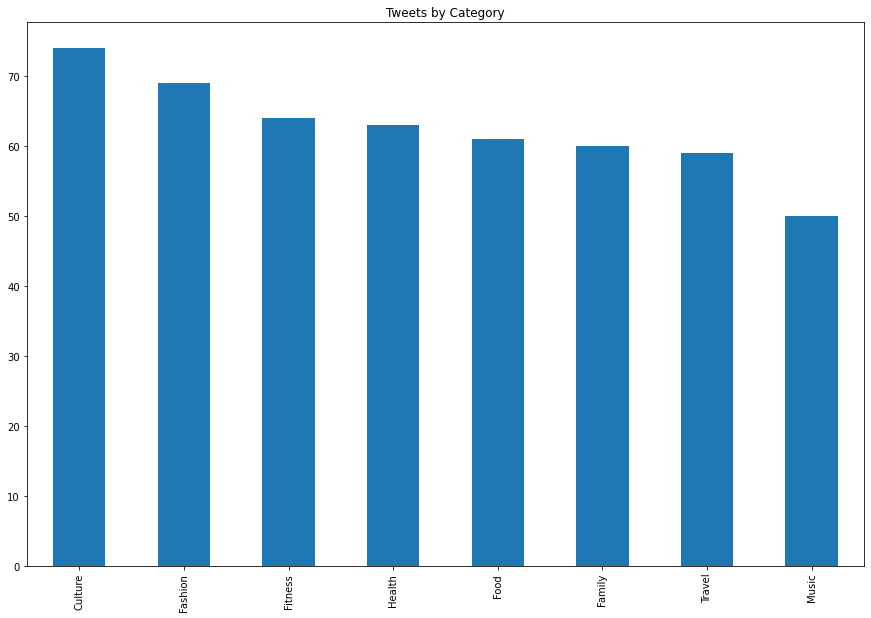

In [20]:
dframe['Category'].value_counts().plot(kind='bar', figsize=(15,10), title='Tweets by Category')

In [ ]:
From the bar chart above, the top four categories with the most tweets are Culture, Fashion, Fitness, and Health. 
Music has the least amount of tweets. 

In [14]:
#Droping all NULL and NA values
dframe.dropna(inplace = True)

In [15]:
#Checking if there are any duplicate values
print(dframe.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [16]:
#Dropping all duplicate fields
dframe.drop_duplicates(inplace=True)

In [17]:
dframe.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
dtype: object

In [18]:
dframe.index = pd.to_datetime(dframe['Date'], format='%m/%d/%y %I:%M%p')

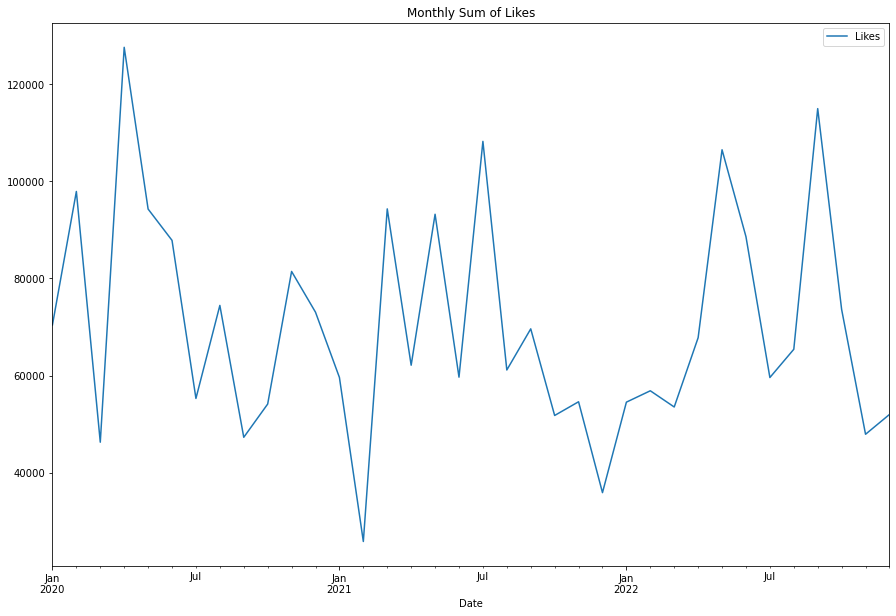

In [21]:
#Plotting the sum of likes grouped by month in a line chart
fig, ax=plt.pyplot.subplots(figsize=(15,10))
bp = dframe.groupby(pd.Grouper(freq='M')).sum().plot(kind='line', ax=ax, title='Monthly Sum of Likes')

In [ ]:
From the figure above, it looks like there is some seasonality in the likes. Although the popular tweets are spreadout randomly
throughout the year, tweets made between Janurary and July, in Spring season, generate more likes.

Text(0.5, 1.0, 'Distribution of Likes in Tweets')

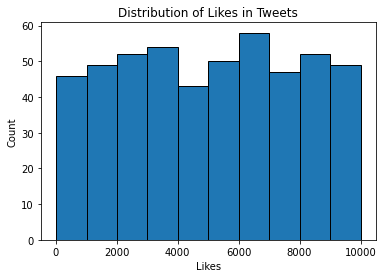

In [28]:
#Plotting the histrogram into 10 bins to see the number of times tweets with the same amount of likes
plt.pyplot.hist(dframe['Likes'],bins =10, edgecolor='black')
plt.pyplot.xlabel("Likes")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Distribution of Likes in Tweets")

In [ ]:
From the figure above, we see that tweets usually get likes between 6000-7000 likes followed by likes in the range of 3000-4000 
likes. So if our tweet gets more than 7000 likes it becomes popular. 

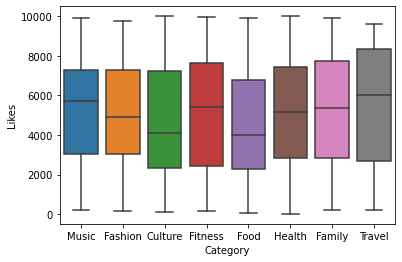

In [24]:
#Plotting a boxplot to show how likes are distributed across various categories in Twitter
sns.boxplot(x='Category', y='Likes', data = dframe)

In [ ]:
In the figure above, we see that tweets in the Travel category receive a lot of likes followed by Fitness, Family and Culture. 

In [25]:
#Average of all the likes on tweets
dframe['Likes'].mean()

5054.856

In [26]:
#Grouping average likes by category
dframe.groupby('Category').mean()

,Likes
Category,
Culture,4687.067568
Family,5223.266667
Fashion,4944.623188
Fitness,5146.515625
Food,4585.836066
Health,5095.317460
Music,5364.140000
Travel,5553.983051


In [ ]:
The Travel category has the highest mean. The Music, Family, Fitness and Health Categories have means above the average likes.

In [ ]:
In conclusion, I would recommend my clients to tweet about Travel related topics to optimize their social media presence. Number 
of Tweets made in the Travel category are the second lowest yet they have the highest mean and they receive more likes than any 
other category. Tweets made in the spring season have more likes than other times in the year. 

Secondly, I would recommend my clients to tweet about music if they can because this category has the least tweets but yet it
generates high likes most of the time.

I would also recommend my clients to tweet about family and fitness. People seem to like tweets about family and fitness that 
bring positive vibes. Tweets about festive events like thanksgiving and Christmas focusing on family, and tweets about fitness
events, fitness goals, and fitness accomplishments seem to generate more likes.